In [29]:
import numpy as np
from tiny_gp import TinyGP, GeneticSolver
import os
TinyGP.set_java_path("java")  # set path to JVM

Usage example

In [3]:
from tiny_gp import Operation, FitnessFunction
# read in data
targets = list()
with open("./problem.dat", "r") as f:
    line = f.readline()
    varnumber, _, _, _, fitnesscases = [int(s) for s in line.split()]
    for line in f:
        targets.extend([float(s) for s in line.split()])

targets_np = np.array(targets)
targets_np = targets_np.reshape([fitnesscases, varnumber + 1])

Server started
-- TINY GP (Java version) --
SEED=-1
MAX_LEN=10000
POPSIZE=100000
DEPTH=5
CROSSOVER_PROB=0.9
PMUT_PER_NODE=0.05
MIN_RANDOM=-5.0
MAX_RANDOM=5.0
GENERATIONS=30
TSIZE=2
----------------------------------
Generation=0 Avg Fitness=8407.027991777642 Best Fitness=637.3238288338248 Avg Size=10.9947
Best Individual: ((((X1 + 0.9447229042390823) + ((X1 * X1) - (-1.0742506052511178 - -1.4787195192233185))) + (-1.840451574169312 * -4.089698996424701)) - ((-3.8297075086144683 / -2.8817742185593653) - -3.428069166872697))
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0.12s
Generation=1 Avg Fitness=3719.8119678960084 Best Fitness=621.1814547404039 Avg Size=11.39086
Best Individual: ((((X1 + 0.9447229042390823) + ((X1 * X1) - (-1.0742506052511178 - -1.4787195192233185))) + (-1.840451574169312 * -4.089698996424701)) - ((-3.8297075086144683 / -2.572403331435029) - -3.428069166872697))
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

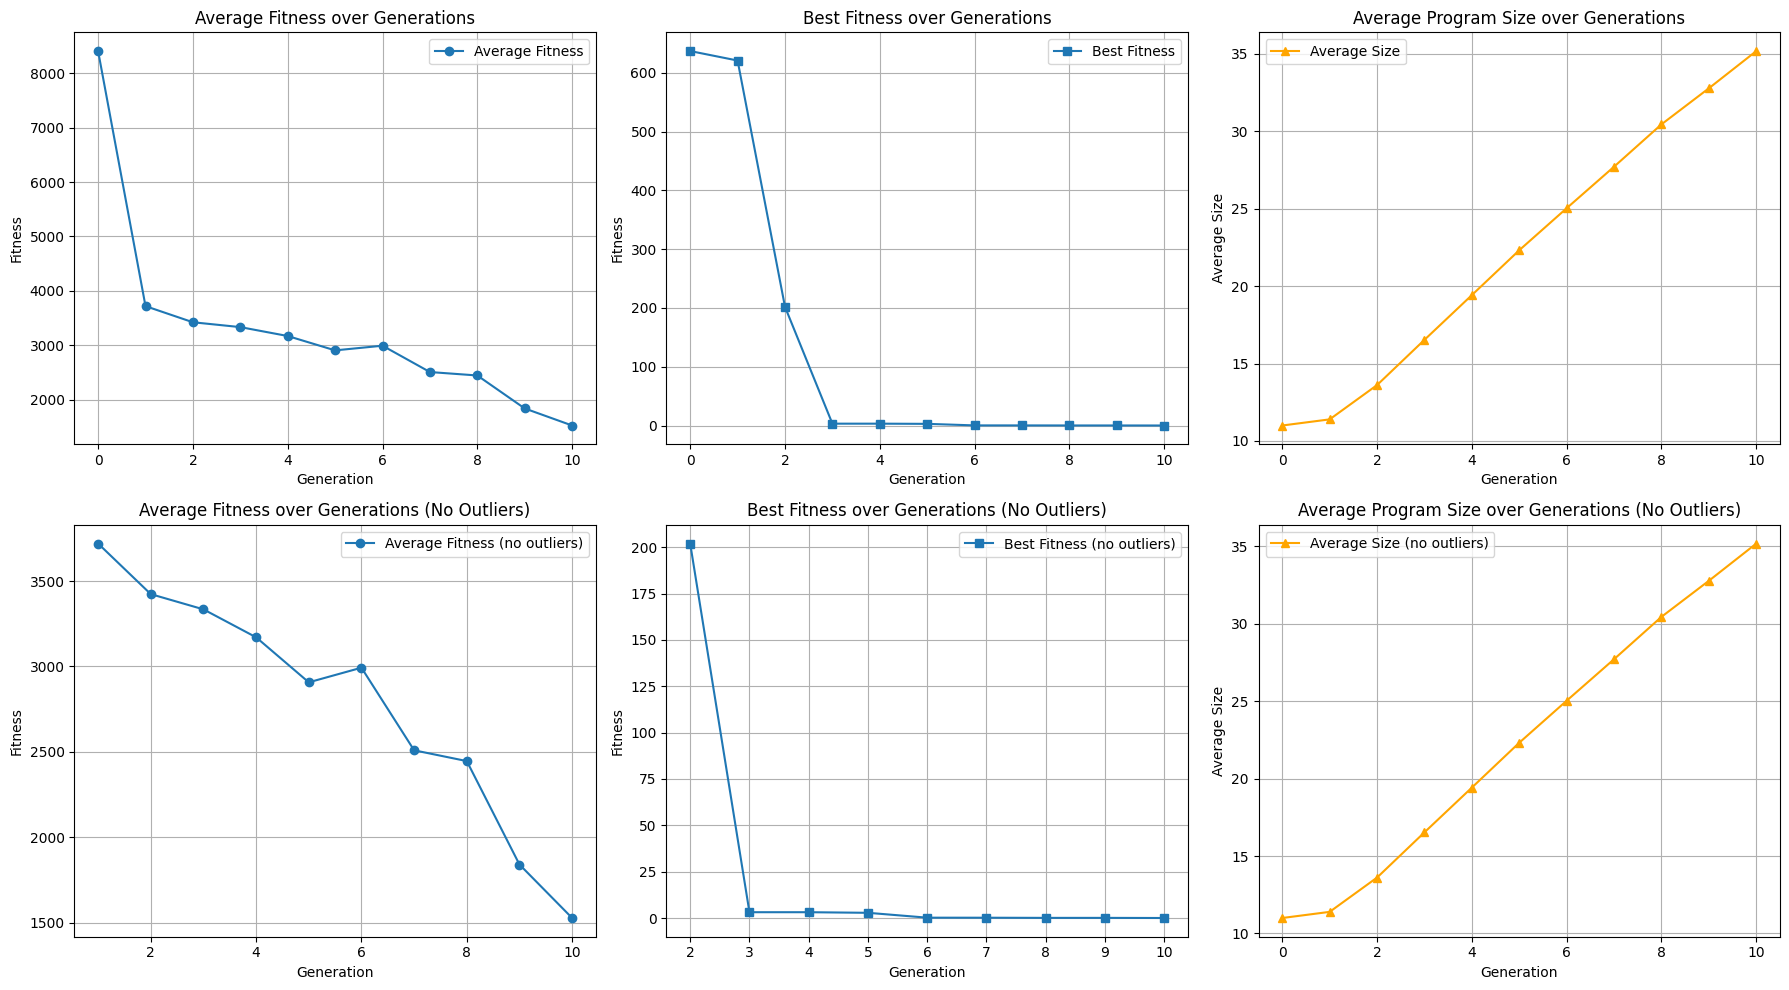

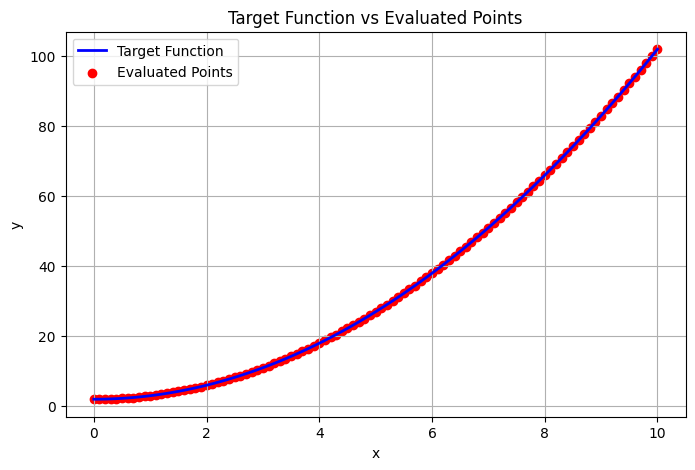

array([  2.99999511,   5.99999511,  10.99999511,  17.99999511,
        26.99999511,  37.99999511,  50.99999511,  65.99999511,
        82.99999511, 101.99999511])

In [4]:
tiny_gp = TinyGP(
    constant_count=100,
    min_random=-5,
    max_random=5,
    operations={Operation.ADD, Operation.MUL, Operation.SUB, Operation.DIV},
    goal_fitness=0.001,
    fitness_function=FitnessFunction.MAE,
    generations=30,
    population_size=100000,
    tournament_size=2,
    depth=5,
    mutation_probability=0.05,
    crossover_probability=0.9,
    max_length=10000
)
tiny_gp.fit(targets_np)
tiny_gp.hist.plot()
tiny_gp.plot()
tiny_gp.evaluate(
    np.asarray([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
)

In [30]:
class Problems:
    p1_a:GeneticSolver;p1_b:GeneticSolver;p1_c:GeneticSolver;p1_d:GeneticSolver;p2_a:GeneticSolver;p2_b:GeneticSolver;p2_c:GeneticSolver;p2_d:GeneticSolver;p3_a:GeneticSolver;p3_b:GeneticSolver;p3_c:GeneticSolver;p3_d:GeneticSolver;p4_a:GeneticSolver;p4_b:GeneticSolver;p4_c:GeneticSolver;p5_a:GeneticSolver;p5_b:GeneticSolver;p5_c:GeneticSolver;p5_d:GeneticSolver;p6_a:GeneticSolver;p7_a:GeneticSolver;p7_b:GeneticSolver;p8_a:GeneticSolver;p8_b:GeneticSolver;p8_c:GeneticSolver
    def __init__(self):
        for file in os.listdir("gps"):
            if file.endswith(".json"):
                self.__setattr__(f"p{file[-8:-5]}", GeneticSolver.from_json(file[3:-5]))

In [31]:
problems = Problems()

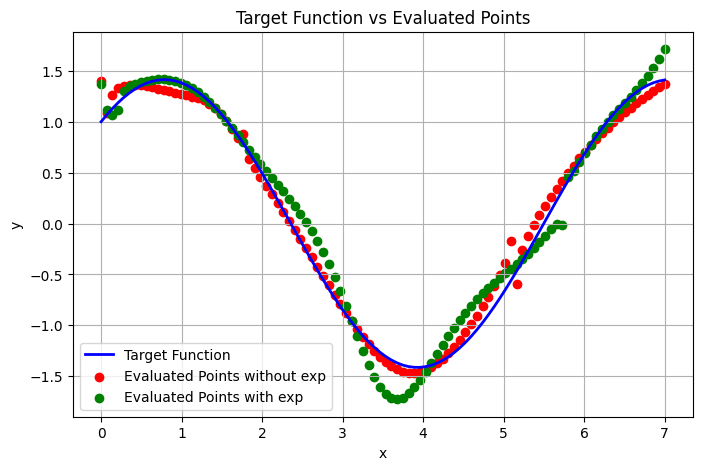

In [32]:
# TODO add better 3d plot
# TODO compare between exercises 8 and 2
# TODO show the formula of the function
problems.p2_b.compare_with_another(problems.p8_a)

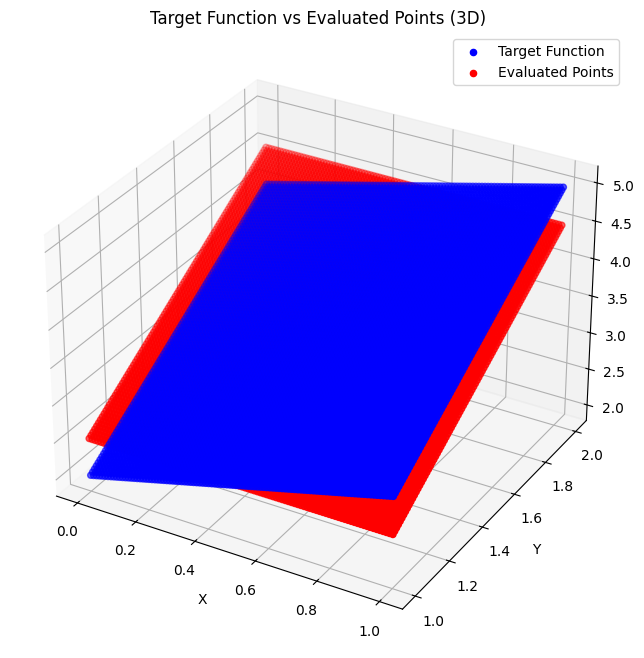

In [33]:
problems.p4_a.plot()